# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('avito-text-classification/train.csv')
test = pd.read_csv('avito-text-classification/test.csv')

In [4]:
train.head()
test.head()

,title,description,itemid
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804
3,Запчасти для GLE,Запчасти GLE,1689811299
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240


In [5]:
train.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [6]:
print('TRAIN DATA')
print(pd.isna(train).sum(axis = 0), end = '\n\n')
print('TEST DATA')
print(pd.isna(test).sum(axis = 0))

TRAIN DATA
title            0
description      2
Category_name    0
Category         0
dtype: int64

TEST DATA
title          0
description    1
itemid         0
dtype: int64


In [7]:
import numpy as np
train1 = train.replace(np.nan, '', regex=True)
test1 = test.replace(np.nan, '', regex=True)

print('TRAIN DATA')
print(pd.isna(train1).sum(axis = 0), end = '\n\n')
print('TEST DATA')
print(pd.isna(test1).sum(axis = 0))

TRAIN DATA
title            0
description      0
Category_name    0
Category         0
dtype: int64

TEST DATA
title          0
description    0
itemid         0
dtype: int64


## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [8]:
train1['title_descr'] = train1[['title', 'description']].agg(' '.join, axis=1)
train1.head()

,title,description,Category_name,Category,title_descr
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупом Возьму машину в аренду...
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27,"Полусапожки полусапожки в отличном состоянии, ..."
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27,Босоножки кожаные Кожаные(натур) босоножки Kar...


In [9]:
test1['title_descr'] = test1[['title', 'description']].agg(' '.join, axis=1)
test1.head()

,title,description,itemid,title_descr
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823,Мастерка Мастерка фирмы форвард. Белого цвета....
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962,"Зимние сапоги Продаю зимние сапоги, в хорошем ..."
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804,Видеонаблюдение 8 камер В комплект Atis AMD-2M...
3,Запчасти для GLE,Запчасти GLE,1689811299,Запчасти для GLE Запчасти GLE
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240,Бластер nerf Состояние 5+/\nПродаю потому что ...


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [10]:
print('Количество классов:', len(train1.Category_name.unique()))

Количество классов: 50


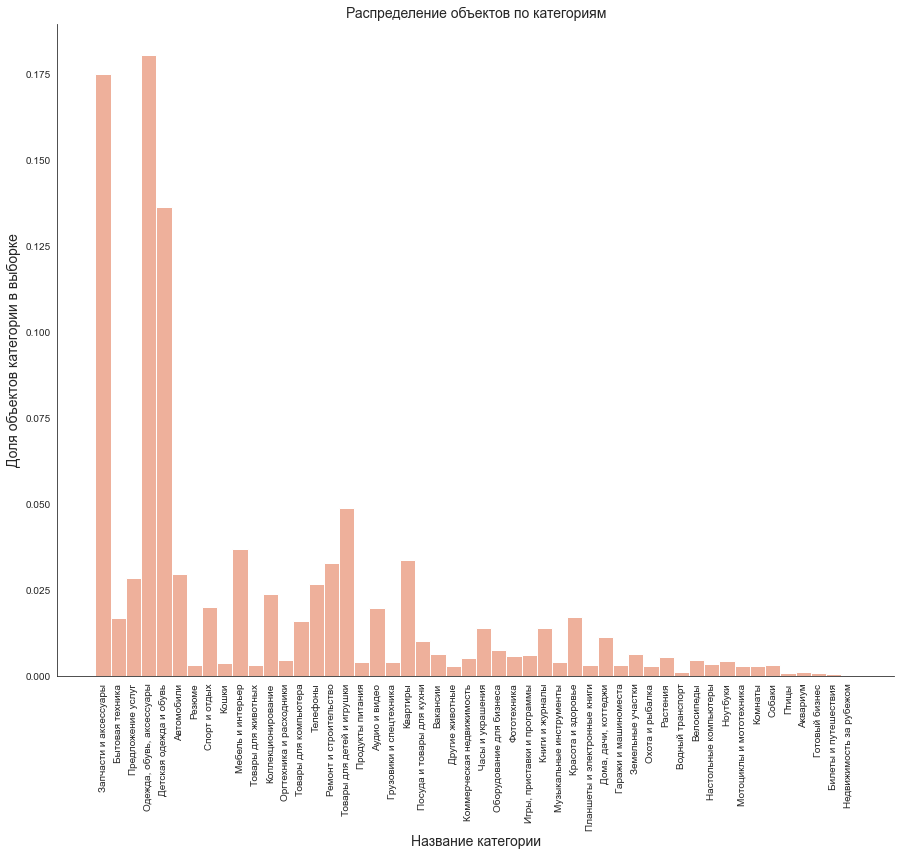

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.set_style("white")
plt.xlabel('Название категории', fontsize=14)
plt.ylabel('Доля объектов категории в выборке', fontsize=14)
plt.title('Распределение объектов по категориям', fontsize=14)

sns_plot = sns.histplot(train1['Category_name'], stat = 'probability',color='darksalmon')
fig = sns_plot.get_figure()
plt.xticks(rotation=90, horizontalalignment='center')
sns.despine()
plt.show()

Дисбаланс классов очень большой, что видно невооруженным глазом на графике. По графику видно класс, имеющий наибольшую долю в выборке - это категория "Одежда, обсувь, аксессуары". Доля в выборке - выше 0,175. Однако из-за большого дисбаланса классов сложнее сделать вывод о наименее представленной в выборке категории. Воспользуюсь value_counts для точного ответа:

In [12]:
max_categ = train1['Category_name'].value_counts().index.tolist()[0]
max_value = train1['Category_name'].value_counts()[0]
min_categ = train1['Category_name'].value_counts().index.tolist()[-1]
min_value = train1['Category_name'].value_counts()[-1]
datashape = train1.shape[0]

print('Наибольшую долю в выборке имеет класс "', max_categ, '", доля класса в выборке равна ', 
                                                "{:.6f}".format(max_value/datashape), sep = '')
print('Наименьшую долю в выборке имеет класс "', min_categ, '", доля класса в выборке равна ', 
                                                "{:.6f}".format(min_value/datashape), sep = '')

Наибольшую долю в выборке имеет класс "Одежда, обувь, аксессуары", доля класса в выборке равна 0.180707
Наименьшую долю в выборке имеет класс "Недвижимость за рубежом", доля класса в выборке равна 0.000039


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train1.title_descr)
print('Размер матрицы:', X.shape)

Размер матрицы: (4234042, 2125805)


Матрица очень немаленькая!

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [14]:
dict_avito = vectorizer.vocabulary_

In [15]:
num_start = dict((key,value) for key, value in dict_avito.items() if key[0].isdigit())
print('Количество слов, начинающихся на цифру:', len(num_start.keys()))
print('Всего такие слова встречаются в данных', 
      sum(np.array(list(num_start.items()))[:, 1].astype(np.float)), 'раз(а).')

Количество слов, начинающихся на цифру: 610944
Всего такие слова встречаются в данных 186731478339.0 раз(а).


In [16]:
import string

punct_start = dict((key,value) for key, value in dict_avito.items() if key[0] in string.punctuation)
print('Количество слов, начинающихся на цифру:', len(punct_start.keys()))
print('Всего такие слова встречаются в данных', 
      sum(np.array(list(punct_start.items()))[:, 1].astype(np.float)), 'раз(а).')

Количество слов, начинающихся на цифру: 2043
Всего такие слова встречаются в данных 1250095356.0 раз(а).


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [17]:
my_text = train1.title_descr[0]

In [18]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import snowballstemmer

stemmer = snowballstemmer.stemmer('russian')
russian_stopwords = stopwords.words('russian')

def tokenize_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens \
              if token not in russian_stopwords and token.isalpha() == True]
    tokens = stemmer.stemWords(tokens)
    
    return tokens

In [19]:
tokenize_text(my_text)

['эб',
 'renault',
 'nissan',
 'dci',
 'delphi',
 'год',
 'комплект',
 'эб',
 'мозг',
 'компьютер',
 'мотор',
 'двигател',
 'коммутатор',
 'электрон',
 'блок',
 'управлен',
 'двигател',
 'компьютер',
 'мотор',
 'рен',
 'kangoo',
 'канг',
 'канг',
 'мега',
 'сценик',
 'laguna',
 'лагун',
 'clio',
 'кли',
 'nissan',
 'micra',
 'нисса',
 'микр',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'аппаратур',
 'делф',
 'оригина',
 'отличн',
 'состоян',
 'проверен',
 'гарант',
 'запчаст',
 'предоставля',
 'гарант',
 'возможн',
 'установк',
 'подробн',
 'раздел',
 'компан',
 'дорож',
 'сво',
 'репутац',
 'торгу',
 'легальн',
 'контрактн',
 'запчаст',
 'дета',
 'налич',
 'таможен',
 'документ',
 'запчаст',
 'автомобил',
 'пробег',
 'росс',
 'отправля',
 'друг',
 'регион',
 'таможен',
 'союз',
 'транспортн',
 'компан',
 'наложн',
 'платеж']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [23]:
n_rows = 500000
data_500 = train1.sample(n = n_rows)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

count_vect = CountVectorizer(tokenizer = tokenize_text)
X = count_vect.fit_transform(data_500.title_descr)

In [24]:
y = data_500.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
clf = SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('----CLASSIFICATION 1. Count vectorizer----')
print('Размер матрицы:', X.shape)
print('Доля правильных ответов классификатора:', accuracy_score(y_test, y_pred))

----CLASSIFICATION 1. Count vectorizer----
Размер матрицы: (500000, 205209)
Доля правильных ответов классификатора: 0.852504


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

tfidf_vect = TfidfVectorizer(tokenizer = tokenize_text)
X2 = tfidf_vect.fit_transform(data_500.title_descr)

In [26]:
y2 = data_500.Category
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25)
clf_tfidf = SGDClassifier()
clf_tfidf.fit(X_train2, y_train2)
y_pred2 = clf_tfidf.predict(X_test2)

print('----CLASSIFICATION 2. Tf-Idf Vectorizer, max_df = 1.0----')
print('Размер матрицы:', X2.shape)
print('Доля правильных ответов классификатора:', accuracy_score(y_test2, y_pred2), end='\n\n')

----CLASSIFICATION 2. Tf-Idf Vectorizer, max_df = 1.0----
Размер матрицы: (500000, 205209)
Доля правильных ответов классификатора: 0.833528



Качество с новым векторизатором стало ниже.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

tfidf_vect1 = TfidfVectorizer(tokenizer = tokenize_text, max_df = 0.9)
X3 = tfidf_vect1.fit_transform(data_500.title_descr)

In [28]:
y3 = data_500.Category
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25)
clf_tfidf1 = SGDClassifier()
clf_tfidf1.fit(X_train3, y_train3)
y_pred3 = clf_tfidf1.predict(X_test3)

print('----CLASSIFICATION 3. Tf-Idf Vectorizer, max_df = 0.9----')
print('Размер матрицы:', X3.shape)
print('Доля правильных ответов классификатора:', accuracy_score(y_test3, y_pred3))

----CLASSIFICATION 3. Tf-Idf Vectorizer, max_df = 0.9----
Размер матрицы: (500000, 205209)
Доля правильных ответов классификатора: 0.832888


Размер матрицы не изменился - видимо, не было досаточно часто встречающихся слов (??). И качество немного упало.

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [29]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

hash_vect = HashingVectorizer(n_features=30000, tokenizer = tokenize_text)
X4 = hash_vect.fit_transform(data_500.title_descr)

C:\Python\ANACONDA\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [30]:
y4 = data_500.Category
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25)
clf_tfidf2 = SGDClassifier()
clf_tfidf2.fit(X_train4, y_train4)
y_pred4 = clf_tfidf2.predict(X_test4)

print('----CLASSIFICATION 4. Hashing Vectorizer, n_features = 30 000----')
print('Размер матрицы:', X4.shape)
print('Доля правильных ответов классификатора:', accuracy_score(y_test4, y_pred4))

----CLASSIFICATION 4. Hashing Vectorizer, n_features = 30 000----
Размер матрицы: (500000, 30000)
Доля правильных ответов классификатора: 0.81632


**Самое высокое качество** - у модели, которая использовалась в первом подходе (с использованием CountVectorizer).

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [24]:
train_x = data_500.title_descr
train_y = data_500.Category
test_x = train1.title_descr

In [25]:
train_x.head()

3262314    Диски опель астра J/ зафира/ шевроле круз Прод...
1146899    iPhone 5s В хорошем состоянии, прилагаются нау...
3493399    Бокалы свадебные Свадебные /\nХрусталь/\nНовые...
3790193    Паровозик-пазлы Свинка пеппа Любимая свинка Пе...
999997     Развивающий коврик Tiny Love Продам развивающи...
Name: title_descr, dtype: object

In [26]:
train_y.head()

3262314     10
1146899    114
3493399     87
3790193     30
999997      30
Name: Category, dtype: int64

In [27]:
test_x.head()

0    Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ...
1    Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2    Возвму машину с выкупом Возьму машину в аренду...
3    Полусапожки полусапожки в отличном состоянии, ...
4    Босоножки кожаные Кожаные(натур) босоножки Kar...
Name: title_descr, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

In [29]:
vectorizer_fin = CountVectorizer(tokenizer = tokenize_text)
train_x = vectorizer_fin.fit_transform(train_x)

In [30]:
test_x = vectorizer_fin.fit_transform(test_x)

KeyboardInterrupt: 

In [ ]:
clf = SGDClassifier()
clf.fit(train_x, train_y)

In [ ]:
y_predict = clf.predict()